In [117]:
import numpy as np
import pandas as pd
from scipy.signal import kaiserord, lfilter, firwin, butter
from scipy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt

Load 1 channel of subject 1 data

In [118]:
x =  pd.read_csv(r'C:/Users/tomry/Documents/EEG/train/subj1_series1_data.csv')
x.drop('id', inplace=True, axis=1)
x = x.to_numpy()
x = x[:,0]

In [119]:
fs = 500
nyq = fs/2
def plot_freq_domain(signal, low=0, high=nyq-0.001):
    num_samples = len(signal)
    yf = rfft(signal) # rfft as input is real numbers
    xf = rfftfreq(num_samples, 1/fs) # get frequencies
    
    low_idx = np.where(xf>=low)[0][0]
    high_idx = np.where(xf>=high)[0][0]
    fig, ax = plt.subplots(figsize=(15,2))
    
    ax.plot(xf[low_idx:high_idx], np.abs(yf[low_idx:high_idx])) # abs because yf is complex 

    plt.ylabel('Amplitude')
    plt.xlabel('Hz')
    plt.show()

View frequency domain of the signal

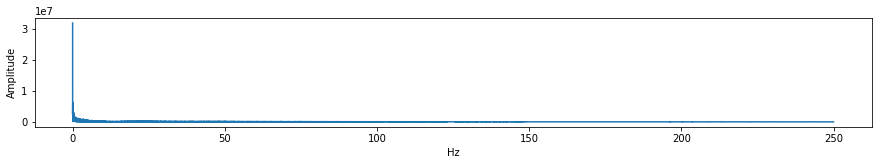

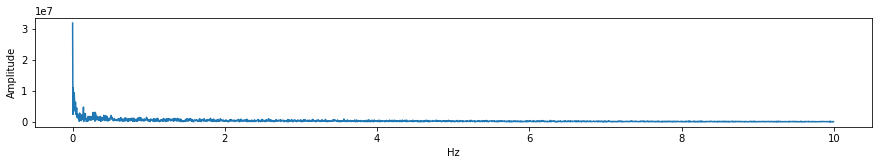

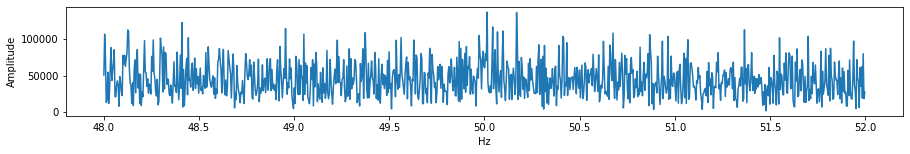

In [120]:
plot_freq_domain(x)
plot_freq_domain(x, 0, 10)
plot_freq_domain(x, 48, 52)

## FIR filters

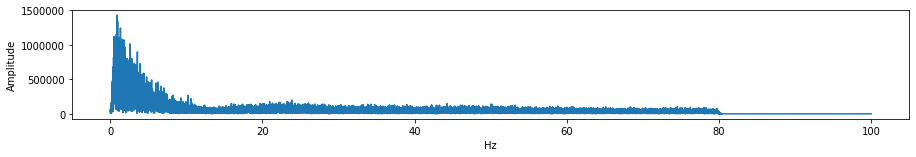

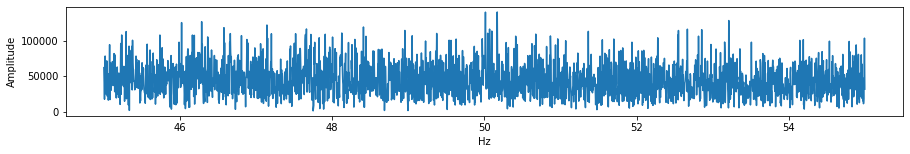

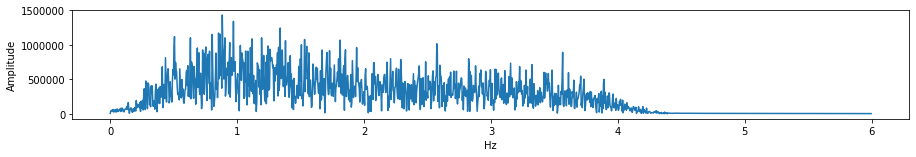

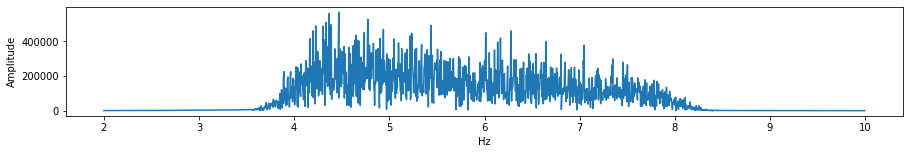

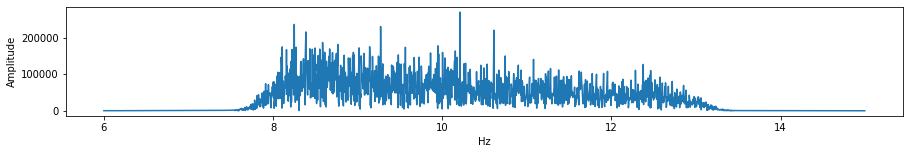

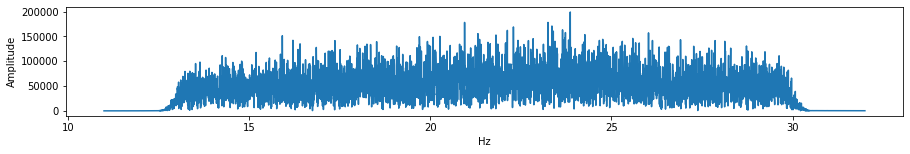

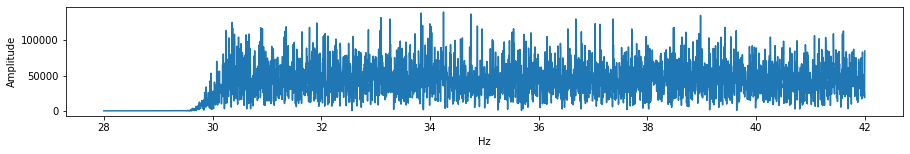

In [128]:
def FIR_bandpass_filter(x, cutoffs): 
    cutoffs = [cutoffs[0]/nyq, cutoffs[1]/nyq]
    width = 1/nyq
    ripple_db = 60
    N, beta = kaiserord(ripple_db, width) # obtain order and Kaiser parameter 
    taps = firwin(N, cutoffs, window=('kaiser', beta), pass_zero='bandpass')
    filtered_x = lfilter(taps, 1.0, x, axis=0)
    return filtered_x

plot_freq_domain(FIR_bandpass_filter(x, [0.5, 80]), 0, 100)
plot_freq_domain(FIR_bandpass_filter(x, [0.5, 4]), 0, 6)
plot_freq_domain(FIR_bandpass_filter(x, [4, 8]), 2, 10)
plot_freq_domain(FIR_bandpass_filter(x, [8, 13]), 6, 15)
plot_freq_domain(FIR_bandpass_filter(x, [13, 30]), 11, 32)
plot_freq_domain(FIR_bandpass_filter(x, [30, 80]), 28,42)

## IIR filters

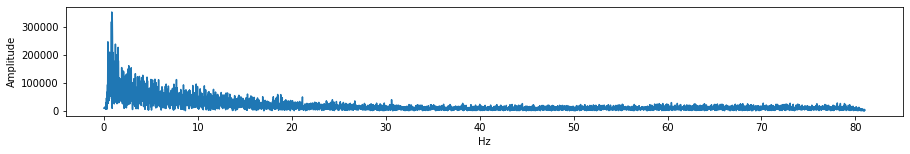

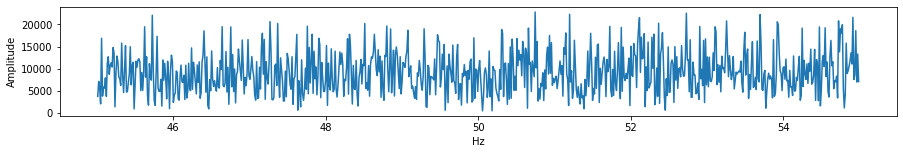

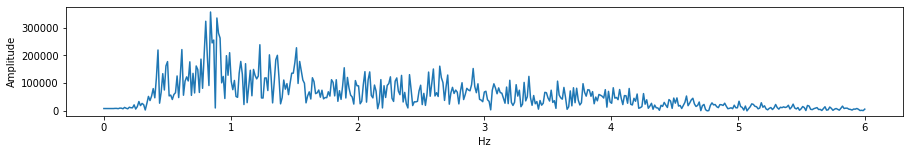

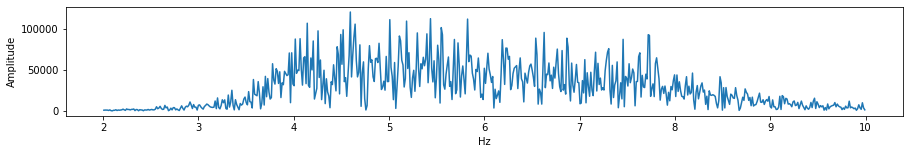

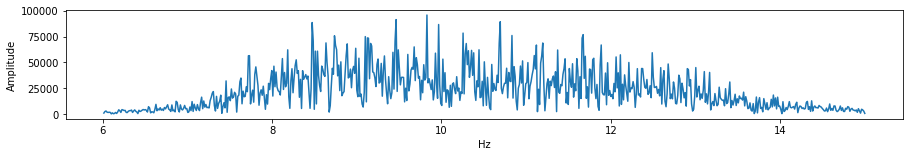

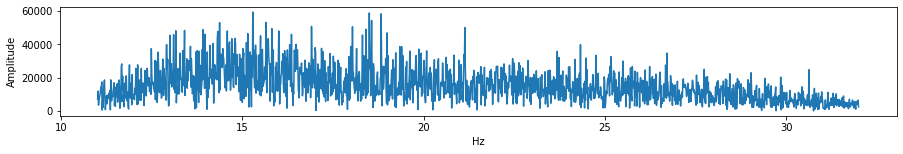

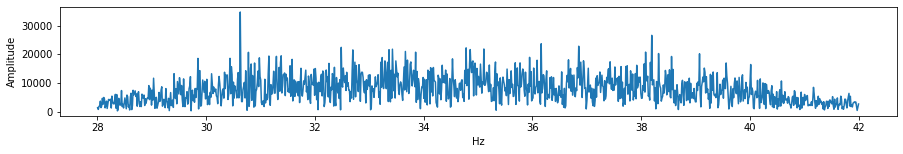

In [132]:
x = x[::3]
fs= 500/3

def IIR_bandpass_filter(x, cutoffs):
    b, a = butter(4, cutoffs, fs=fs, btype='bandpass')
    filtered_x = lfilter(b, a, x, axis=0)
    return filtered_x

plot_freq_domain(IIR_bandpass_filter(x, [0.5, 80]), 0, 81)
plot_freq_domain(IIR_bandpass_filter(x, [0.5, 80]), 45, 55)
plot_freq_domain(IIR_bandpass_filter(x, [0.5, 4]), 0, 6)
plot_freq_domain(IIR_bandpass_filter(x, [4, 8]), 2, 10)
plot_freq_domain(IIR_bandpass_filter(x, [8, 13]), 6, 15)
plot_freq_domain(IIR_bandpass_filter(x, [13, 30]), 11, 32)
plot_freq_domain(IIR_bandpass_filter(x, [30, 40]), 28,42)

## Time delay of FIR vs IIR filter

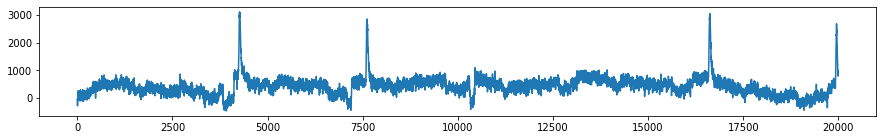

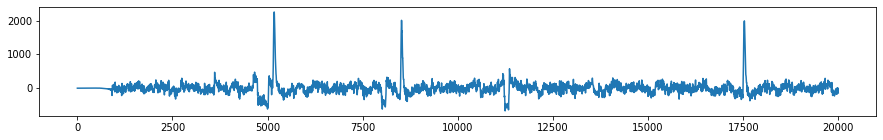

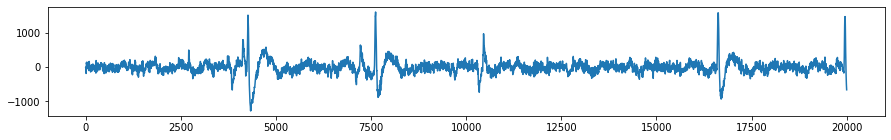

In [123]:
fig, ax = plt.subplots(figsize=(15,2))
ax.plot(x[0:20000])
plt.show()

fig, ax = plt.subplots(figsize=(15,2))
ax.plot(FIR_bandpass_filter(x, [0.5, 40])[0:20000])
plt.show()

fig, ax = plt.subplots(figsize=(15,2))
ax.plot(IIR_bandpass_filter(x, [0.5, 40])[0:20000])
plt.show()